<a href="https://colab.research.google.com/github/Piyushydv08/Machine-Learning/blob/main/End_to_End_Toy_Project_%7C_Day_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps :
1. Preprocess + EDA + Feature Selection
2. Extract input and output tools
3. Scale the values
4. Train test split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df=df.iloc[:,1:]

In [6]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [8]:
import matplotlib.pyplot as plt

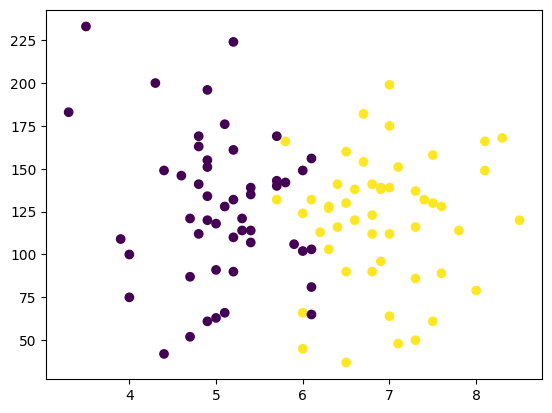

In [10]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

In [11]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [19]:
x_train

,cgpa,iq
2,5.3,121.0
87,5.7,132.0
74,6.7,154.0
96,4.4,42.0
40,4.9,134.0
...,...,...
25,5.0,91.0
36,5.7,140.0
37,8.1,149.0
3,7.4,132.0


In [20]:
y_train

,placement
2,0
87,1
74,1
96,0
40,0
...,...
25,0
36,0
37,1
3,1


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [22]:
x_train = scaler.fit_transform(x_train)

In [23]:
x_test = scaler.fit_transform(x_test)

In [24]:
x_train

array([[-0.62536362, -0.03623928],
       [-0.27193991,  0.24849794],
       [ 0.61161936,  0.81797239],
       [-1.42056697, -2.08117025],
       [-0.97878733,  0.30026834],
       [ 0.43490751, -2.21059626],
       [-0.97878733,  0.74031678],
       [ 1.31846678, -1.58935141],
       [ 1.58353457, -0.2174357 ],
       [-0.80207547,  1.38744683],
       [ 0.43490751, -0.83868055],
       [-1.77399068, -0.57982853],
       [ 2.20202606, -0.06212448],
       [-0.8904314 , -0.11389489],
       [-0.71371955,  0.9991688 ],
       [-0.18358398,  0.50734996],
       [ 0.52326344, -0.06212448],
       [ 0.78833122,  0.40380915],
       [-1.42056697,  0.68854638],
       [-1.15549918, -0.03623928],
       [ 0.61161936,  1.54275804],
       [-0.71371955,  0.24849794],
       [ 0.34655158,  0.48146476],
       [-0.27193991,  0.53323516],
       [ 0.52326344,  0.40380915],
       [ 0.0814838 ,  0.24849794],
       [-1.15549918, -0.91633615],
       [-1.77399068, -1.22695858],
       [-0.97878733,

In [25]:
x_test

array([[-0.37261385,  0.01690852],
       [-0.54198378,  1.89798147],
       [ 1.23640049, -1.01873838],
       [ 2.08325014,  0.71438501],
       [ 0.22018091,  0.46075719],
       [-0.37261385, -0.57488971],
       [-1.64288832, -0.53261841],
       [ 0.13549594, -1.88530007],
       [ 0.13549594,  0.31280764],
       [-0.88072364,  0.60870675]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
# Model Training

clf.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = clf.predict(x_test)

In [32]:
y_test

,placement
49,0
16,0
90,1
53,1
8,0
81,0
31,0
10,1
33,0
34,0


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.8

In [37]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

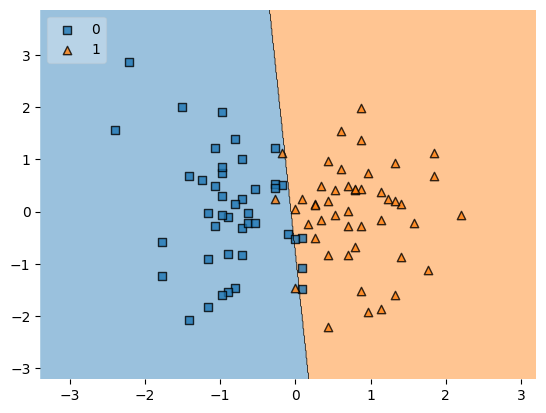

In [39]:
x=x_train
y=y_train.values
plot_decision_regions(x, y, clf=clf, legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf, open('model.pkl', 'wb'))